# Everything about PCA in VAMPIRE Analysis

27 March 2022

Objective: Explore the purpose of PCA in VAMPIRE analysis.

Hypothesis: PCA acts as a noise reduction tool and a dimensionality reduction tool.

## Baseline data setup

### Baseline VAMPIRE analysis

Baseline VAMPIRE analysis applies PCA on normalized contours, followed by K-Means clustering of principal components in the PC space.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import vampire as vp
import umap
from sklearn import manifold
vp.plot.set_plot_style()

In [2]:
img_set_path = r'C:\Files\github-projects\nance-lab-data\microfiber\ogd_severity_segmentations'
output_path = r'C:\Files\github-projects\nance-lab-data\microfiber\result\result-2022-03-27'

In [3]:
# extract properties from all images for future use
vp.extraction.extract_properties(img_set_path)

Contour and properties data already exist in path: C:\Files\github-projects\nance-lab-data\microfiber\ogd_severity_segmentations
Contour and properties data already exist in path: C:\Files\github-projects\nance-lab-data\microfiber\ogd_severity_segmentations


,filename,image_id,label,y,x,area,perimeter,major_axis_length,minor_axis_length,eccentricity,solidity,extent,raw_contour,circularity,aspect_ratio
0,4-50-10_40x_cortex_1_otsu_thresh.tif,0,1,15.287546,435.902930,546,151.331998,43.249832,20.983343,0.874422,0.733871,0.445714,"[[31, 32, 32, 33, 33, 34, 34, 33, 32, 32, 31, ...",0.299599,2.061151
1,4-50-10_40x_cortex_1_otsu_thresh.tif,0,2,10.072993,326.744526,137,52.870058,18.821565,10.968044,0.812660,0.796512,0.619910,"[[6, 7, 8, 10, 10, 11, 11, 12, 12, 11, 11, 10,...",0.615901,1.716037
2,4-50-10_40x_cortex_1_otsu_thresh.tif,0,3,17.034161,173.686335,322,80.390873,21.623979,20.497617,0.318534,0.851852,0.559028,"[[9, 11, 11, 12, 13, 13, 12, 13, 14, 16, 17, 1...",0.626112,1.054951
3,4-50-10_40x_cortex_1_otsu_thresh.tif,0,4,14.797945,359.595890,292,121.396970,35.454355,19.406167,0.836900,0.534799,0.421356,"[[6, 5, 5, 6, 6, 8, 9, 10, 11, 11, 12, 12, 13,...",0.248987,1.826963
4,4-50-10_40x_cortex_1_otsu_thresh.tif,0,5,16.157895,294.768421,95,38.970563,13.720758,9.320021,0.733894,0.887850,0.659722,"[[5, 6, 7, 8, 9, 10, 10, 11, 11, 8, 5, 5, 6, 5...",0.786068,1.472181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37551,4-59_4_40x_thalamus_5_yen_thresh.tif,679,58,474.028037,84.548287,321,103.704581,25.784169,17.927831,0.718716,0.777240,0.535000,"[[9, 10, 10, 11, 12, 18, 19, 19, 20, 19, 20, 1...",0.375076,1.438220
37552,4-59_4_40x_thalamus_5_yen_thresh.tif,679,59,473.782787,444.692623,244,69.840620,18.268459,17.689399,0.249779,0.856140,0.642105,"[[11, 12, 13, 13, 12, 13, 14, 16, 18, 18, 17, ...",0.628613,1.032735
37553,4-59_4_40x_thalamus_5_yen_thresh.tif,679,60,492.679487,317.794872,78,41.627417,14.753169,7.560113,0.858723,0.772277,0.650000,"[[6, 6, 7, 6, 7, 7, 6, 7, 6, 7, 6, 7, 5, 3, 4,...",0.565647,1.951448
37554,4-59_4_40x_thalamus_5_yen_thresh.tif,679,61,497.462500,377.925000,80,49.213203,12.533468,9.838682,0.619505,0.701754,0.555556,"[[3, 4, 5, 6, 7, 6, 7, 8, 9, 10, 10, 9, 10, 10...",0.415085,1.273897


Contour and properties data already exist in path: C:\Files\github-projects\nance-lab-data\microfiber\ogd_severity_segmentations
Contour and properties data already exist in path: C:\Files\github-projects\nance-lab-data\microfiber\ogd_severity_segmentations


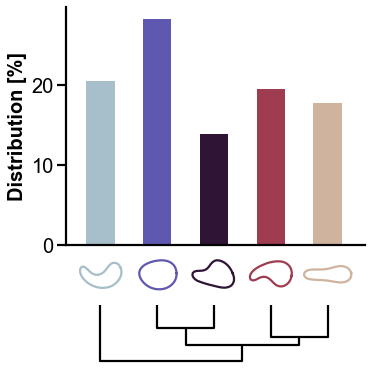

In [4]:
build_info_df = pd.DataFrame({
        'img_set_path': [img_set_path],
        'output_path': [output_path],
        'model_name': ['otsu'],
        'num_points': [np.nan],
        'num_clusters': [np.nan],
        'num_pc': [np.nan],
        'threshold': ['otsu'],
    })
vp.quickstart.build_models(build_info_df, random_state=1)

In [47]:
model_path = os.path.join(output_path, 'model_otsu_(50_5_32)__otsu.pickle')
vampire_model = vp.util.read_pickle(model_path)

Contour and properties data already exist in path: C:\Files\github-projects\nance-lab-data\microfiber\ogd_severity_segmentations
Contour and properties data already exist in path: C:\Files\github-projects\nance-lab-data\microfiber\ogd_severity_segmentations


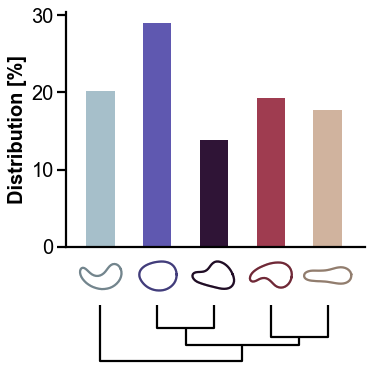

In [48]:
apply_info_df = pd.DataFrame({
        'img_set_path': [img_set_path],
        'model_path': [model_path],
        'output_path': [output_path],
        'img_set_name': ['otsu'],
    })
vp.quickstart.apply_models(apply_info_df)

In [50]:
property_path = os.path.join(output_path, 'apply-properties_otsu_on_otsu_(50_5_32)__.pickle')
apply_properties_df = vp.util.read_pickle(property_path)

### Data processing

#### Label experimental metadata

In [115]:
apply_properties_df.head()

,filename,image_id,label,y,x,area,perimeter,major_axis_length,minor_axis_length,eccentricity,...,extent,raw_contour,circularity,aspect_ratio,normalized_contour,cluster_id,distance_to_centroid,slice_id,treatment,region
0,4-50-10_40x_cortex_1_otsu_thresh.tif,0,1,15.287546,435.902930,546,151.331998,43.249832,20.983343,0.874422,...,0.445714,"[[31, 32, 32, 33, 33, 34, 34, 33, 32, 32, 31, ...",0.299599,2.061151,"[1.2789408950846899, 1.145640214214933, 1.2228...",0,0.649145,4-50-10,Normal Control,cortex
1,4-50-10_40x_cortex_1_otsu_thresh.tif,0,2,10.072993,326.744526,137,52.870058,18.821565,10.968044,0.812660,...,0.619910,"[[6, 7, 8, 10, 10, 11, 11, 12, 12, 11, 11, 10,...",0.615901,1.716037,"[1.2105649636463367, 1.169584766265315, 1.2661...",0,0.944191,4-50-10,Normal Control,cortex
2,4-50-10_40x_cortex_1_otsu_thresh.tif,0,3,17.034161,173.686335,322,80.390873,21.623979,20.497617,0.318534,...,0.559028,"[[9, 11, 11, 12, 13, 13, 12, 13, 14, 16, 17, 1...",0.626112,1.054951,"[1.0070992333054538, 0.8511732667483877, 0.732...",1,0.713021,4-50-10,Normal Control,cortex
3,4-50-10_40x_cortex_1_otsu_thresh.tif,0,4,14.797945,359.595890,292,121.396970,35.454355,19.406167,0.836900,...,0.421356,"[[6, 5, 5, 6, 6, 8, 9, 10, 11, 11, 12, 12, 13,...",0.248987,1.826963,"[1.417753544686556, 1.1815271564991154, 1.0568...",3,0.855888,4-50-10,Normal Control,cortex
4,4-50-10_40x_cortex_1_otsu_thresh.tif,0,5,16.157895,294.768421,95,38.970563,13.720758,9.320021,0.733894,...,0.659722,"[[5, 6, 7, 8, 9, 10, 10, 11, 11, 8, 5, 5, 6, 5...",0.786068,1.472181,"[1.1107822170796604, 1.0716873569624206, 1.010...",0,0.878832,4-50-10,Normal Control,cortex


In [116]:
def label_df(properties_df, id_df, target_props, search_prop='filename'):
    """
    properties_df : DataFrame
        Contains "filename" column
    id_df : DataFrame
        Contains columns listed in `properties` and "regex" column.
    target_props : list
        List of property(s) to be added. Must match column name in `id_df`.
    """
    properties_df = properties_df.copy()
    properties_df[target_props] = np.nan
    for i in range(id_df['regex'].size):
        mask = properties_df[search_prop].astype(str).str.contains(id_df['regex'][i])
        properties_df.loc[mask, target_props] = id_df.iloc[i, :][target_props].values
    return properties_df

In [117]:
slice_id_df = pd.read_excel(r'C:\Files\github-projects\nance-lab-data\microfiber\slice-labels.xlsx')
slice_id_df['regex'] = slice_id_df['slice_id'] + '_'
slice_id_df.head()

,slice_id,treatment,regex
0,4-50-4,Normal Control,4-50-4_
1,4-50-7,Normal Control,4-50-7_
2,4-50-10,Normal Control,4-50-10_
3,4-50-15,Normal Control,4-50-15_
4,4-56-1,OGD 0.5h,4-56-1_


In [118]:
region_names = ['cortex', 'thalamus', 'hippocampus']
region_id_df = pd.DataFrame({
    'regex': region_names,
    'region': region_names,
})

In [119]:
apply_properties_df = label_df(apply_properties_df, slice_id_df, ['slice_id', 'treatment'])
apply_properties_df = label_df(apply_properties_df, region_id_df, ['region'])

In [120]:
apply_properties_df

,filename,image_id,label,y,x,area,perimeter,major_axis_length,minor_axis_length,eccentricity,...,extent,raw_contour,circularity,aspect_ratio,normalized_contour,cluster_id,distance_to_centroid,slice_id,treatment,region
0,4-50-10_40x_cortex_1_otsu_thresh.tif,0,1,15.287546,435.902930,546,151.331998,43.249832,20.983343,0.874422,...,0.445714,"[[31, 32, 32, 33, 33, 34, 34, 33, 32, 32, 31, ...",0.299599,2.061151,"[1.2789408950846899, 1.145640214214933, 1.2228...",0,0.649145,4-50-10,Normal Control,cortex
1,4-50-10_40x_cortex_1_otsu_thresh.tif,0,2,10.072993,326.744526,137,52.870058,18.821565,10.968044,0.812660,...,0.619910,"[[6, 7, 8, 10, 10, 11, 11, 12, 12, 11, 11, 10,...",0.615901,1.716037,"[1.2105649636463367, 1.169584766265315, 1.2661...",0,0.944191,4-50-10,Normal Control,cortex
2,4-50-10_40x_cortex_1_otsu_thresh.tif,0,3,17.034161,173.686335,322,80.390873,21.623979,20.497617,0.318534,...,0.559028,"[[9, 11, 11, 12, 13, 13, 12, 13, 14, 16, 17, 1...",0.626112,1.054951,"[1.0070992333054538, 0.8511732667483877, 0.732...",1,0.713021,4-50-10,Normal Control,cortex
3,4-50-10_40x_cortex_1_otsu_thresh.tif,0,4,14.797945,359.595890,292,121.396970,35.454355,19.406167,0.836900,...,0.421356,"[[6, 5, 5, 6, 6, 8, 9, 10, 11, 11, 12, 12, 13,...",0.248987,1.826963,"[1.417753544686556, 1.1815271564991154, 1.0568...",3,0.855888,4-50-10,Normal Control,cortex
4,4-50-10_40x_cortex_1_otsu_thresh.tif,0,5,16.157895,294.768421,95,38.970563,13.720758,9.320021,0.733894,...,0.659722,"[[5, 6, 7, 8, 9, 10, 10, 11, 11, 8, 5, 5, 6, 5...",0.786068,1.472181,"[1.1107822170796604, 1.0716873569624206, 1.010...",0,0.878832,4-50-10,Normal Control,cortex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37551,4-59_4_40x_thalamus_5_yen_thresh.tif,679,58,474.028037,84.548287,321,103.704581,25.784169,17.927831,0.718716,...,0.535000,"[[9, 10, 10, 11, 12, 18, 19, 19, 20, 19, 20, 1...",0.375076,1.438220,"[1.189590332601449, 1.2482444600198266, 1.1507...",1,0.912908,4-59_4,OGD 0.5h + AZO,thalamus
37552,4-59_4_40x_thalamus_5_yen_thresh.tif,679,59,473.782787,444.692623,244,69.840620,18.268459,17.689399,0.249779,...,0.642105,"[[11, 12, 13, 13, 12, 13, 14, 16, 18, 18, 17, ...",0.628613,1.032735,"[1.1075452857055088, 1.024107283861717, 0.8952...",1,0.451973,4-59_4,OGD 0.5h + AZO,thalamus
37553,4-59_4_40x_thalamus_5_yen_thresh.tif,679,60,492.679487,317.794872,78,41.627417,14.753169,7.560113,0.858723,...,0.650000,"[[6, 6, 7, 6, 7, 7, 6, 7, 6, 7, 6, 7, 5, 3, 4,...",0.565647,1.951448,"[1.283294779854549, 1.1955866840075404, 0.9910...",4,1.010485,4-59_4,OGD 0.5h + AZO,thalamus
37554,4-59_4_40x_thalamus_5_yen_thresh.tif,679,61,497.462500,377.925000,80,49.213203,12.533468,9.838682,0.619505,...,0.555556,"[[3, 4, 5, 6, 7, 6, 7, 8, 9, 10, 10, 9, 10, 10...",0.415085,1.273897,"[1.138378561937431, 0.8732066787041672, 0.8846...",1,0.943339,4-59_4,OGD 0.5h + AZO,thalamus


#### Label coloring

In [121]:
from matplotlib.colors import to_hex
color_id_df = pd.DataFrame({
    'cluster_id': [0, 1, 2, 3, 4],
    'color': [to_hex(plt.get_cmap('twilight')(np.linspace(0.1, 0.9, 5))[i]) for i in range(5)],
})
color_id_df['regex'] = color_id_df['cluster_id'].astype(str)

In [122]:
label_colors = label_df(apply_properties_df, color_id_df, ['color'], 'cluster_id').color.values
label_colors

array(['#a6bfca', '#a6bfca', '#5f58b0', ..., '#d0b39e', '#5f58b0',
       '#9f3c50'], dtype=object)

## Contour visual representations (This should be moved to KMeans clustering)

The paper states that contours are represented by centroid reconstruction of each cluster. However, the mean contour of each cluster is used instead. Here, we comapre the two types of visualization.

- Cluster centroid reconstruction (Paper)
- Mean contour of each cluster (Implementation)

### Cluster centroid reconstruction

To reconstruct the shape, we use 

$$\text{PCA reconstruction = (PC score)(principal directions) + mean}$$

[Additional resource: How to reverse PCA and reconstruct original variables from several principal components?](https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-comhttps://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-comhttps://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-comhttps://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com)

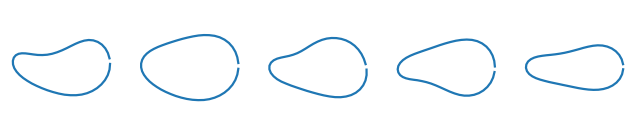

In [123]:
fig, axs = plt.subplots(1, vampire_model.num_clusters, figsize=(10, 2))
principal_directions = vampire_model.principal_directions[:, :vampire_model.num_pc].T
mean_contour = vampire_model.mean_aligned_contour
for i in range(vampire_model.num_clusters):
    # calculate reconstructions
    centroid_pc = vampire_model.centroids[i]
    centroid_coord = centroid_pc @ principal_directions + mean_contour
    centroid_x = centroid_coord[:vampire_model.num_points]
    centroid_y = centroid_coord[vampire_model.num_points:]
    # plot reconstructions
    axs[i].plot(centroid_x, centroid_y)
    axs[i].axis('equal')
    axs[i].axis('off')

### Mean contour of each cluster

<AxesSubplot:>

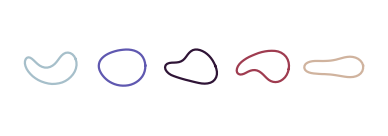

In [124]:
vp.plot.plot_contours(vampire_model)

### Discussion

Comparing the two methods, the cluster centroid reconstruction has less variation between groups than mean contour of each cluster. Small change from centroid reconstruction is a large change in the real contour space.

We can plot some contours randomly selected representatives from each cluster as our standard for comparison. The mean contour of each cluster resembles the representatives the most, as expected, because overlay of the representatives are the mean representation of the contours.

(I would call the centroid reconstruction as "shape mode" and the mean contour of each cluster as "mean representation of shape mode", but the original paper calls the mean contour as "shape mode".)

<AxesSubplot:>

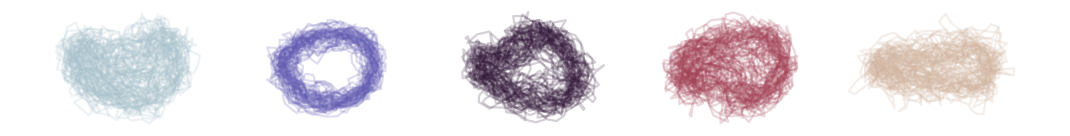

In [125]:
vp.plot.plot_representatives(vampire_model, apply_properties_df, num_sample=50, random_state=1, alpha=0.2)

**Conclusion**: We will stick with mean contour of each cluster for visualization purposes. It's more easy to identify and associate features to them.

## Baseline PCA analysis

### PCA explained variance

In [126]:
vampire_model.num_pc

32

Text(0, 0.5, 'Explained variance ratio')

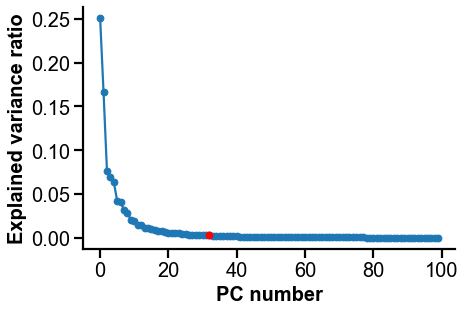

In [127]:
plt.plot(vampire_model.explained_variance_ratio, 'o-')
plt.plot(vampire_model.num_pc, 
         vampire_model.explained_variance_ratio[vampire_model.num_pc], 'ro-')
plt.xlabel('PC number')
plt.ylabel('Explained variance ratio')

^ The explained variance ratio of each PC decreases dramatically at first two. Elbow rule suggests that we can keep the first 2, 5, or 9 PCs, depending on our judgement.

Text(0, 0.5, 'Cumulative explained variance ratio')

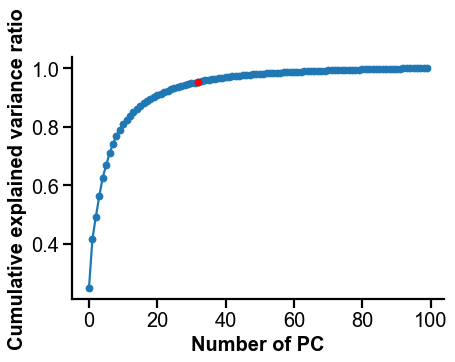

In [128]:
plt.plot(vampire_model.cum_explained_variance_ratio, 'o-')
plt.plot(vampire_model.num_pc, 
         vampire_model.cum_explained_variance_ratio[vampire_model.num_pc], 'ro-')
plt.xlabel('Number of PC')
plt.ylabel('Cumulative explained variance ratio')

^ The cumulative explained variance ratio at 2, 5, and 9 is ~40%, 65%, and 75%. To cover 95% of total variance, the first 32 PCs are kept (shown in red).

The plots suggests that PCA filters and denoises the data by neglecting non-contributing portion in the PC space.

### PC space visualization

In [129]:
Y = vp.analysis.pca_transform_contours(normalized_contours,
                                       vampire_model.mean_aligned_contour,
                                       vampire_model.principal_directions)

Text(0, 0.5, 'PC 2 (17%)')

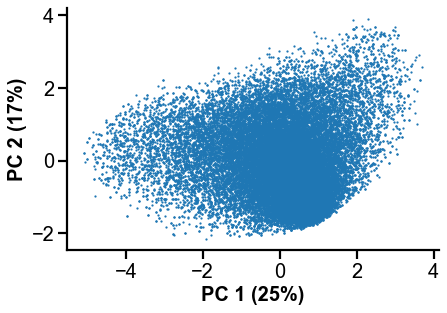

In [130]:
plt.scatter(Y[:, 0], Y[:, 1], s=1)
plt.xlabel(f'PC 1 ({round(vampire_model.explained_variance_ratio[0]*100)}%)')
plt.ylabel(f'PC 2 ({round(vampire_model.explained_variance_ratio[1]*100)}%)')

^ The first two PC captures ~42% total variance. There is no clear separation between clusters. Rather, we see a big cluster.

Text(0, 0.5, 'PC 2 (17%)')

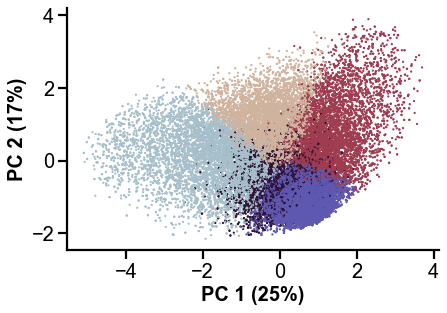

In [131]:
plt.scatter(Y[:, 0], Y[:, 1], s=1, color=label_colors)
plt.xlabel(f'PC 1 ({round(vampire_model.explained_variance_ratio[0]*100)}%)')
plt.ylabel(f'PC 2 ({round(vampire_model.explained_variance_ratio[1]*100)}%)')

^ After annotating with result of VAMPIRE analysis cluster, we see that the first two PC separates all clusters expect the dark cluster (cluster 3). 

```{hint}
This may suggest that four clusters is enough to capture the shape variations. However, this may also be cautioned that only less than 50% of total variance is captured.
```

Text(0, 0.5, 'PC 2 (17%)')

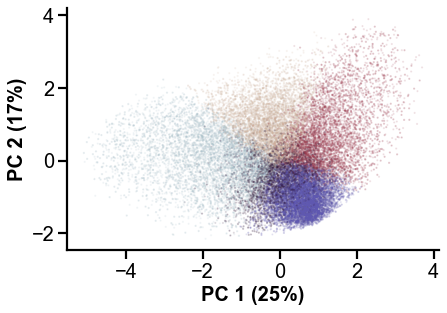

In [132]:
plt.scatter(Y[:, 0], Y[:, 1], s=1, color=label_colors, alpha=0.1)
plt.xlabel(f'PC 1 ({round(vampire_model.explained_variance_ratio[0]*100)}%)')
plt.ylabel(f'PC 2 ({round(vampire_model.explained_variance_ratio[1]*100)}%)')

^ Changing alpha helps to gauge numbers of samples in each cluster.

Text(0, 0.5, 'PC 3 (8%)')

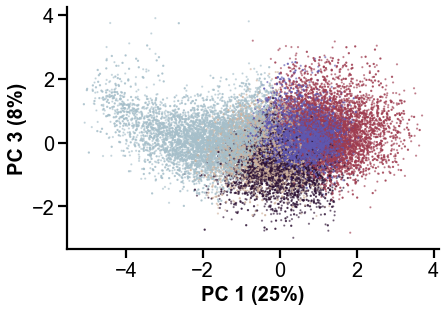

In [133]:
plt.scatter(Y[:, 0], Y[:, 2], s=1, color=label_colors, alpha=0.5)
plt.xlabel(f'PC 1 ({round(vampire_model.explained_variance_ratio[0]*100)}%)')
plt.ylabel(f'PC 3 ({round(vampire_model.explained_variance_ratio[2]*100)}%)')

Text(0.5, 0, 'PC 3 (8%)')

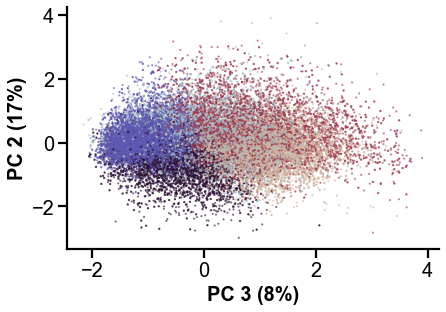

In [134]:
plt.scatter(Y[:, 1], Y[:, 2], s=1, color=label_colors, alpha=0.5)
plt.ylabel(f'PC 2 ({round(vampire_model.explained_variance_ratio[1]*100)}%)')
plt.xlabel(f'PC 3 ({round(vampire_model.explained_variance_ratio[2]*100)}%)')

^ Plots of PC 2 and 3 also do not show effective separation of clusters.

## Elimination of PCA for direct clustering

In [139]:
normalized_contours = np.vstack(apply_properties_df['normalized_contour'].values)

In [140]:
direct_cluster_id_df, direct_centroids, inertia = vp.analysis.cluster_contours(normalized_contours, num_clusters=5, num_pc=100)

In [150]:
direct_cluster_id_df.head()

,cluster_id,distance_to_centroid
0,3,0.315153
1,4,0.204438
2,2,0.241172
3,0,0.342129
4,4,0.165726


In [181]:
direct_df = pd.concat([apply_properties_df.drop(['cluster_id', 'distance_to_centroid'], axis=1), direct_cluster_id_df], axis=1)

In [182]:
direct_df.head()

,filename,image_id,label,y,x,area,perimeter,major_axis_length,minor_axis_length,eccentricity,...,extent,raw_contour,circularity,aspect_ratio,normalized_contour,slice_id,treatment,region,cluster_id,distance_to_centroid
0,4-50-10_40x_cortex_1_otsu_thresh.tif,0,1,15.287546,435.902930,546,151.331998,43.249832,20.983343,0.874422,...,0.445714,"[[31, 32, 32, 33, 33, 34, 34, 33, 32, 32, 31, ...",0.299599,2.061151,"[1.2789408950846899, 1.145640214214933, 1.2228...",4-50-10,Normal Control,cortex,3,0.315153
1,4-50-10_40x_cortex_1_otsu_thresh.tif,0,2,10.072993,326.744526,137,52.870058,18.821565,10.968044,0.812660,...,0.619910,"[[6, 7, 8, 10, 10, 11, 11, 12, 12, 11, 11, 10,...",0.615901,1.716037,"[1.2105649636463367, 1.169584766265315, 1.2661...",4-50-10,Normal Control,cortex,4,0.204438
2,4-50-10_40x_cortex_1_otsu_thresh.tif,0,3,17.034161,173.686335,322,80.390873,21.623979,20.497617,0.318534,...,0.559028,"[[9, 11, 11, 12, 13, 13, 12, 13, 14, 16, 17, 1...",0.626112,1.054951,"[1.0070992333054538, 0.8511732667483877, 0.732...",4-50-10,Normal Control,cortex,2,0.241172
3,4-50-10_40x_cortex_1_otsu_thresh.tif,0,4,14.797945,359.595890,292,121.396970,35.454355,19.406167,0.836900,...,0.421356,"[[6, 5, 5, 6, 6, 8, 9, 10, 11, 11, 12, 12, 13,...",0.248987,1.826963,"[1.417753544686556, 1.1815271564991154, 1.0568...",4-50-10,Normal Control,cortex,0,0.342129
4,4-50-10_40x_cortex_1_otsu_thresh.tif,0,5,16.157895,294.768421,95,38.970563,13.720758,9.320021,0.733894,...,0.659722,"[[5, 6, 7, 8, 9, 10, 10, 11, 11, 8, 5, 5, 6, 5...",0.786068,1.472181,"[1.1107822170796604, 1.0716873569624206, 1.010...",4-50-10,Normal Control,cortex,4,0.165726


### Cluster centroid

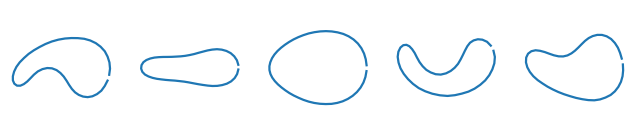

In [183]:
fig, axs = plt.subplots(1, vampire_model.num_clusters, figsize=(10, 2))
for i in range(vampire_model.num_clusters):
    centroid_x = direct_centroids[i, :vampire_model.num_points]
    centroid_y = direct_centroids[i, vampire_model.num_points:]
    # plot reconstructions
    axs[i].plot(centroid_x, centroid_y)
    axs[i].axis('equal')
    axs[i].axis('off')

### Mean contour of each cluster

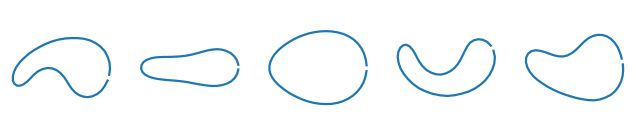

In [184]:
fig, axs = plt.subplots(1, vampire_model.num_clusters, figsize=(10, 2))
for i in range(vampire_model.num_clusters):
    cluster_mask = direct_df['cluster_id'] == i
    normalized_contour = np.vstack(direct_df[cluster_mask]['normalized_contour'])
    mean_normalized_contour = normalized_contour.mean(axis=0)
    contour_x = mean_normalized_contour[:vampire_model.num_points]
    contour_y = mean_normalized_contour[vampire_model.num_points:]
    axs[i].plot(contour_x, contour_y)
    axs[i].axis('equal')
    axs[i].axis('off')

<AxesSubplot:>

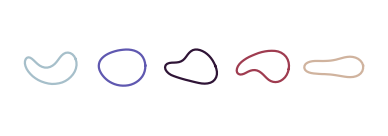

In [163]:
vp.plot.plot_contours(vampire_model)

In [142]:
Y = vp.analysis.pca_transform_contours(normalized_contours,
                                       vampire_model.mean_aligned_contour,
                                       vampire_model.principal_directions)

In [144]:
Y.shape

(37556, 100)

## PCA on morphological parameters

- https://stats.stackexchange.com/questions/183236/what-is-the-relation-between-k-means-clustering-and-pca
- https://pair-code.github.io/understanding-umap/